In [213]:
%matplotlib inline
import os              
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import lightkurve as lk
import numpy as np
from astropy.time import Time, TimeDelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix



In [214]:
print('Current Working Directory:', os.getcwd())

DATA_PATH = '../data/'
FILE_NAME = 'exoplanets.csv'
FULL_PATH = os.path.join(DATA_PATH, FILE_NAME)
exoplanets = pd.read_csv (FULL_PATH, thousands = ',')

exoplanets.head()

Current Working Directory: c:\Users\topol\Exoplanet---Classification\src


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


#### Light curve from kepler

In [215]:
# Load the light curve
light_curve = lk.read('../docs/kepler_10_lc.fits(1)')

#### To see whether data is numerical or not 

In [216]:
exoplanets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

#### summary of numerical attributes

In [217]:
exoplanets.describe()


,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000



#### Preprocessing

In [218]:
## check missing values and remove them
exoplanets.isna()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9560,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9561,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9562,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Drop all irrelevent and missing features, more importantly we should remove all non numerical attributes such as `koi_name`, `kepid`, `kepoi_name`, etc for model simplicity
#### 

In [219]:
X = exoplanets.drop(['rowid', 'koi_disposition', 'kepid', 'koi_score', 'kepler_name', 'kepoi_name', 'koi_teq_err1', 'koi_teq_err2', 'koi_tce_delivname'], axis = 1)

X.head()

,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CANDIDATE,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CANDIDATE,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CANDIDATE,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [220]:
## check non numerical columns if there are any
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_pdisposition   9564 non-null   object 
 1   koi_fpflag_nt      9564 non-null   int64  
 2   koi_fpflag_ss      9564 non-null   int64  
 3   koi_fpflag_co      9564 non-null   int64  
 4   koi_fpflag_ec      9564 non-null   int64  
 5   koi_period         9564 non-null   float64
 6   koi_period_err1    9110 non-null   float64
 7   koi_period_err2    9110 non-null   float64
 8   koi_time0bk        9564 non-null   float64
 9   koi_time0bk_err1   9110 non-null   float64
 10  koi_time0bk_err2   9110 non-null   float64
 11  koi_impact         9201 non-null   float64
 12  koi_impact_err1    9110 non-null   float64
 13  koi_impact_err2    9110 non-null   float64
 14  koi_duration       9564 non-null   float64
 15  koi_duration_err1  9110 non-null   float64
 16  koi_duration_err2  9110 

In [221]:
X.columns[X.isna().sum() > 0]

Index(['koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'koi_kepmag'],
      dtype='object')

In [222]:
## filling all missing values above with the mode or their mean, since they all numeric except the target ``pdisposition``
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    X[column] = X[column].fillna(X[column].mean())

In [223]:
## Clearly we dont have missing values!
X.isna().sum().sum()

0

In [224]:
X

,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CANDIDATE,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CANDIDATE,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CANDIDATE,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,FALSE POSITIVE,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [225]:
## After removing all nun numerical attributes, we can see that remaining object type, is only the target which we will change later to 0/1 binary
X.select_dtypes('object')


,koi_pdisposition
0,CANDIDATE
1,CANDIDATE
2,FALSE POSITIVE
3,FALSE POSITIVE
4,CANDIDATE
...,...
9559,FALSE POSITIVE
9560,FALSE POSITIVE
9561,CANDIDATE
9562,FALSE POSITIVE


In [226]:
## Confirm if there are any missing values: True = if there are, False = if no missing values
X.isnull().values.any()

False

In [227]:
X.dtypes

koi_pdisposition      object
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num     float64
koi_steff            float64
koi_steff_err1       float64
koi_steff_err2       float64
koi_slogg            float64
koi_slogg_err1       float64
koi_slogg_err2

#### We can see that `koi_pdisposition` is a catagorical attribute and it is our target column since it is repetition of  `false positive` and `candidade`. To count how many objects belong to each catagory:


In [228]:
X['koi_pdisposition'].value_counts()

koi_pdisposition
FALSE POSITIVE    5068
CANDIDATE         4496
Name: count, dtype: int64

##### We can Convert categorical label to binary label 0 or 1.
##### 'FALSE POSITIVE' == 0 (not exoplanet) 
##### 'CANDIDATE' == 1 (potential exoplanet). 
##### This conversion simplifies the model training process and since ML algorithms works better with numerical inputs

In [229]:
X['koi_pdisposition'] = X['koi_pdisposition'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)

In [230]:
X.head()

,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [231]:
X['koi_pdisposition'].head()

0    1
1    1
2    0
3    0
4    1
Name: koi_pdisposition, dtype: int64

#### We can analyse data better by plotting some of attributes such as period, magnitude, etc

### Plots

#### The orbital period, is important in determining the distance and the angular velocity of an object/exoplanet.
#### The `koi_period` attribute represents the orbital period of the kepler object in days.
#### The histogram below shows the distribution of `koi_period` values.

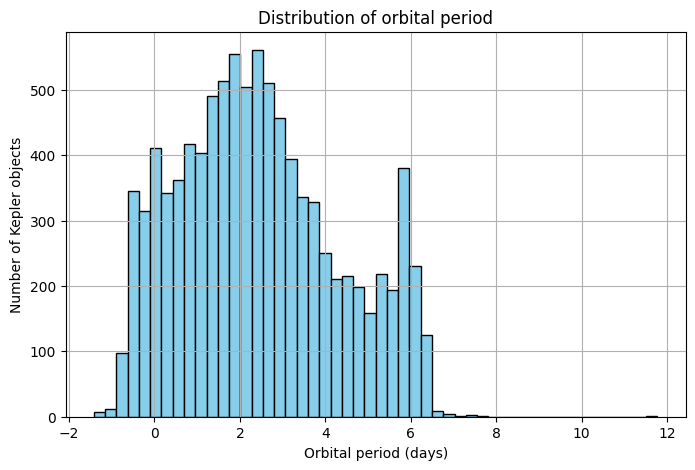

In [232]:
#column = ['koi_fpflag_nt', 'koi_period', 'koi_kepmag', 'ra', 'koi_slogg', 'koi_srad']
plt.figure(figsize= (8, 5))
plt.hist(exoplanets['koi_period'].apply(np.log), bins= 50, color= 'skyblue', edgecolor= 'black')
plt.title('Distribution of orbital period')
plt.xlabel ("Orbital period (days)")
plt.ylabel ("Number of Kepler objects")
plt.grid(True)
plt.show()

#### This is the magnitude of kepler objects and is related to the brightness, we know that the higher the magnitude corresponds to the faint object observed by kepler telescope.
####

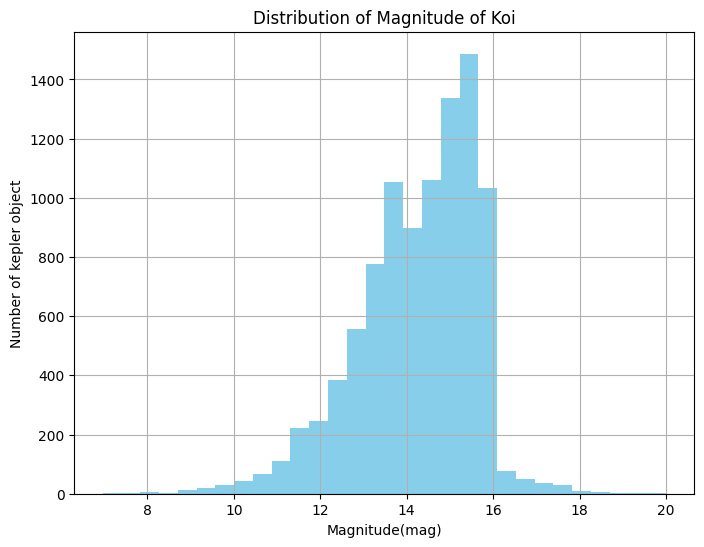

In [233]:
#### magnitude hist
plt.figure(figsize= (8, 6))
plt.hist(exoplanets['koi_kepmag'], bins= 30, color= 'skyblue')
plt.title('Distribution of Magnitude of Koi')
plt.xlabel('Magnitude(mag)')
plt.ylabel('Number of kepler object')
plt.grid(True)

plt.show()

#### The transit Depth is when light is blocked by a celestial body in the universe as the body passes infront of star, sometimes from ellipsing binaries
#### The greater transit depth suggest that the planet has greater radius, so the depth can help us determine the radius of the planet/object 

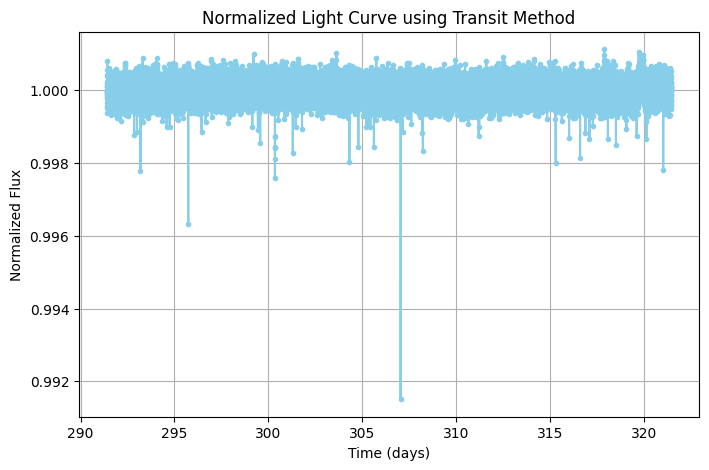

In [234]:
## light_curve plot
time = np.array(light_curve.time.value)
flux = np.array(light_curve.flux.value)

# Replace NaN and Inf with the mean flux
mean_flux = np.nanmean(flux)
flux = np.where(np.isnan(flux) | np.isinf(flux), mean_flux, flux)

# Normalize the flux data
normalized_flux = flux / np.median(flux)
fliped_flux = 1 - (normalized_flux - 1)                         # flip the graph to see the dips

# Plotting the normalized light curve
plt.figure(figsize=(8, 5))
plt.plot(time, fliped_flux, color='skyblue', linestyle='-', marker='.')
plt.xlabel('Time (days)')
plt.ylabel('Normalized Flux')
plt.title('Normalized Light Curve using Transit Method')
plt.grid(True)

plt.show()


### Data Splitting

#### For our Test set, we will fix random seed and allow the dataset to split into training and test sets. 20% of the data will be used for testing and the remaining 80 % will be used for training

In [235]:
## Copy of X data frame
X_copy = X.copy()

In [236]:
## splitting X_data into X and y
y = X_copy['koi_pdisposition']
X = X_copy.drop(columns= ['koi_pdisposition'])
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, shuffle= True, random_state = 12)

In [237]:
X_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
9079,1,0,0,0,504.884190,0.021020,-0.021020,357.647100,0.025800,-0.025800,...,-143.000000,4.612,0.056,-0.024,0.655,0.052,-0.058,285.73474,50.124962,15.588
2756,0,0,1,0,2.250827,0.000001,-0.000001,170.321819,0.000386,-0.000386,...,-116.000000,4.308,0.138,-0.113,1.119,0.177,-0.159,293.57629,46.775471,12.820
8462,0,1,0,0,7.047106,0.000001,-0.000001,132.750150,0.000145,-0.000145,...,-340.000000,3.973,0.234,-0.126,2.321,0.449,-0.674,290.11258,38.399872,9.002
2521,0,0,0,0,11.874577,0.000039,-0.000039,140.212590,0.002690,-0.002690,...,-162.265059,4.506,0.049,-0.098,0.880,0.109,-0.059,291.02859,43.913670,13.756
1512,0,0,0,0,56.188644,0.000264,-0.000264,146.379450,0.003710,-0.003710,...,-114.000000,4.327,0.103,-0.115,1.176,0.182,-0.149,288.64627,50.788979,13.351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9475,0,1,0,0,384.356448,0.003684,-0.003684,298.903540,0.007740,-0.007740,...,-193.000000,4.445,0.067,-0.202,0.994,0.291,-0.125,293.77362,50.124470,14.391
3714,0,0,1,1,1.891259,0.000037,-0.000037,132.689100,0.020800,-0.020800,...,-197.000000,4.410,0.150,-0.165,0.927,0.193,-0.129,290.29932,37.908932,13.517
7409,1,0,0,0,185.103836,0.004791,-0.004791,296.742600,0.013300,-0.013300,...,-109.000000,2.921,0.033,-0.027,6.226,0.724,-0.724,294.96524,44.360481,13.623
3325,0,0,0,0,15.458057,0.000003,-0.000003,173.782454,0.000158,-0.000158,...,-117.000000,4.169,0.176,-0.108,1.407,0.233,-0.284,290.44928,39.854801,13.398


In [238]:
y_train.value_counts()

koi_pdisposition
0    4073
1    3578
Name: count, dtype: int64

#### Scalling, to ensure that the features are on a similar scale

In [239]:
## Scale each feature to a given range, typically between 0 and 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [240]:
## Check scaled values 
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.068863,-0.549413,-0.489316,-0.367875,0.286517,2.320165,-2.320165,2.830562,0.658120,-0.658120,...,0.271752,0.708521,-0.497719,1.423758,-0.170447,-0.340333,0.149393,-1.328062,1.763586,0.952798
1,-0.483357,-0.549413,2.043671,-0.367875,-0.050666,-0.262878,0.262878,0.067157,-0.407081,0.407081,...,0.649266,-0.005818,0.130820,0.360270,-0.098166,-0.202381,0.105631,0.316312,0.828727,-1.042184
2,-0.483357,1.820124,-0.489316,-0.367875,-0.047449,-0.262856,0.262856,-0.487097,-0.417183,0.417183,...,-2.482701,-0.793000,0.866672,0.204929,0.089079,0.097803,-0.117512,-0.410028,-1.508945,-3.793933
3,-0.483357,-0.549413,-0.489316,-0.367875,-0.044210,-0.258160,0.258160,-0.377012,-0.310511,0.310511,...,0.002388,0.459442,-0.551375,0.539509,-0.135397,-0.277427,0.148960,-0.217941,0.029984,-0.367580
4,-0.483357,-0.549413,-0.489316,-0.367875,-0.014483,-0.230539,0.230539,-0.286039,-0.267759,0.267759,...,0.677230,0.038828,-0.137459,0.336371,-0.089286,-0.196863,0.109964,-0.717514,1.948917,-0.659476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,-0.483357,1.820124,-0.489316,-0.367875,0.205663,0.189724,-0.189724,1.963982,-0.098846,0.098846,...,-0.427348,0.316105,-0.413403,-0.703219,-0.117638,-0.076569,0.120363,0.357692,1.763449,0.090084
7647,-0.483357,-0.549413,2.043671,2.718318,-0.050908,-0.258427,0.258427,-0.487998,0.448550,-0.448550,...,-0.483276,0.233862,0.222802,-0.261094,-0.128075,-0.184723,0.118630,-0.370869,-1.645969,-0.539835
7648,2.068863,-0.549413,-0.489316,-0.367875,0.071998,0.325764,-0.325764,1.932104,0.134196,-0.134196,...,0.747140,-3.264988,-0.674017,1.387910,0.697392,0.401297,-0.139176,0.607575,0.154691,-0.463438
7649,-0.483357,-0.549413,-0.489316,-0.367875,-0.041807,-0.262627,0.262627,0.118207,-0.416638,0.416638,...,0.635284,-0.332440,0.422095,0.420016,-0.053302,-0.140578,0.051470,-0.339422,-1.102867,-0.625602


#### Model selection and 
#### Train the model

In [241]:
## define a model
log_model = LogisticRegression(max_iter= 500)                   # Increase max_iter 


rand_model = RandomForestClassifier(n_estimators= 100, random_state= 12)

In [242]:
## Train the model
try: 
    log_model.fit(X_train_scaled, y_train)
    rand_model.fit(X_train_scaled, y_train)
    print("Random Forest model trained successfully.")
    print("Logistic Regression model trained successfully.")

except Exception as e:
    print(f"An error occurred while training Logistic Regression: {e}")    
    print(f"An error occurred while training Random Forest: {e}")


Random Forest model trained successfully.
Logistic Regression model trained successfully.


###  Evaluating Model Performance

In [243]:
### The model is trained succesfully!!, we can make some predictions
log_predict = log_model.predict(X_test_scaled)
rand_predict = rand_model.predict(X_test_scaled)

In [244]:
### Evaluate logistic model
log_model_accuracy = accuracy_score(y_test, log_predict)
log_model_classification_report = classification_report(y_test, log_predict)
log_model_confusion_matrix = confusion_matrix(y_test, log_predict)

In [245]:
### Evaluate random forest model
rand_model_accuracy = accuracy_score(y_test, rand_predict)
rand_model_classification_report = classification_report(y_test, rand_predict)
rand_model_confusion_matrix = confusion_matrix(y_test, rand_predict)

In [246]:
## logistic model
print('Logistic model perfomance:')
print(f'Accuracy: {log_model_accuracy * 100:.2f}%')
print('\nClassification report:\n')
print(log_model_classification_report)
print('\nconfusion matrix:\n')
log_confusion_df = pd.DataFrame(log_model_confusion_matrix, 
                            index= ['True_Negative', 'True_Positive'], 
                            columns= ['Predicted_Negative', 'Predicted_Positive'])
print(log_confusion_df)

Logistic model perfomance:
Accuracy: 98.38%

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       995
           1       0.98      0.99      0.98       918

    accuracy                           0.98      1913
   macro avg       0.98      0.98      0.98      1913
weighted avg       0.98      0.98      0.98      1913


confusion matrix:

               Predicted_Negative  Predicted_Positive
True_Negative                 975                  20
True_Positive                  11                 907


In [247]:
## random forest
print("\nRandom forest perfomance:")
print(f"Accuracy: {rand_model_accuracy * 100:.2f}%")
print("\nClassification report:")
print(rand_model_classification_report)
print("\nconfusion matrix:")
rand_confusion_df = pd.DataFrame(rand_model_confusion_matrix, 
                            index= ['True_Negative', 'True_Positive'], 
                            columns= ['Predicted_Negative', 'Predicted_Positive'])
print(rand_confusion_df)


Random forest perfomance:
Accuracy: 98.38%

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       995
           1       0.99      0.98      0.98       918

    accuracy                           0.98      1913
   macro avg       0.98      0.98      0.98      1913
weighted avg       0.98      0.98      0.98      1913


confusion matrix:
               Predicted_Negative  Predicted_Positive
True_Negative                 986                   9
True_Positive                  22                 896


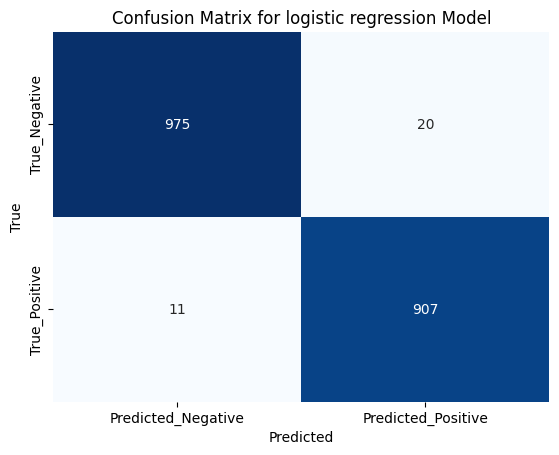

In [248]:
## Plot the confusion matrix for logistic model
sns.heatmap(log_confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for logistic regression Model')

plt.show()

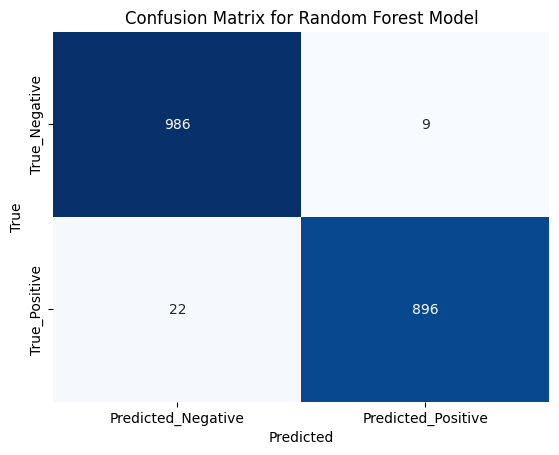

In [249]:
## Plot the confusion matrix using seaborn heatmap
sns.heatmap(rand_confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest Model')

plt.show()